In [348]:
import pandas as pd
import json
import nltk
import matplotlib.pyplot as plt

In [349]:
with open("message.json") as filedata:
    data=json.load(filedata)

In [350]:
data

{'participants': [{'name': 'Lewis Carroll'}, {'name': 'Jane Austen'}],
 'messages': [{'sender_name': 'Jane Austen',
   'timestamp_ms': 1538841981194,
   'content': 'The family of Dashwood had long been settled in Sussex .',
   'type': 'Generic',
   'photos': []},
  {'sender_name': 'Lewis Carroll',
   'timestamp_ms': 1538840624774,
   'content': 'Down the Rabbit - Hole',
   'type': 'Generic',
   'photos': []},
  {'sender_name': 'Jane Austen',
   'timestamp_ms': 1538778691195,
   'content': 'Their estate was large , and their residence was at Norland Park , in the centre of their property , where , for many generations , they had lived in so respectable a manner as to engage the general good opinion of their surrounding acquaintance .',
   'type': 'Generic',
   'photos': []},
  {'sender_name': 'Jane Austen',
   'timestamp_ms': 1538778685507,
   'content': 'The late owner of this estate was a single man , who lived to a very advanced age , and who for many years of his life , had a consta

In [351]:
data.keys()

dict_keys(['participants', 'messages', 'title', 'is_still_participant', 'thread_type', 'thread_path'])

In [352]:
data['messages']

[{'sender_name': 'Jane Austen',
  'timestamp_ms': 1538841981194,
  'content': 'The family of Dashwood had long been settled in Sussex .',
  'type': 'Generic',
  'photos': []},
 {'sender_name': 'Lewis Carroll',
  'timestamp_ms': 1538840624774,
  'content': 'Down the Rabbit - Hole',
  'type': 'Generic',
  'photos': []},
 {'sender_name': 'Jane Austen',
  'timestamp_ms': 1538778691195,
  'content': 'Their estate was large , and their residence was at Norland Park , in the centre of their property , where , for many generations , they had lived in so respectable a manner as to engage the general good opinion of their surrounding acquaintance .',
  'type': 'Generic',
  'photos': []},
 {'sender_name': 'Jane Austen',
  'timestamp_ms': 1538778685507,
  'content': 'The late owner of this estate was a single man , who lived to a very advanced age , and who for many years of his life , had a constant companion and housekeeper in his sister .',
  'type': 'Generic',
  'photos': []},
 {'sender_name':

In [353]:
messages=pd.DataFrame(data["messages"])
messages

,call_duration,content,gifs,missed,photos,reactions,sender_name,share,sticker,timestamp_ms,type,videos
0,NaN,The family of Dashwood had long been settled i...,NaN,NaN,[],NaN,Jane Austen,NaN,NaN,1538841981194,Generic,NaN
1,NaN,Down the Rabbit - Hole,NaN,NaN,[],NaN,Lewis Carroll,NaN,NaN,1538840624774,Generic,NaN
2,NaN,"Their estate was large , and their residence w...",NaN,NaN,[],NaN,Jane Austen,NaN,NaN,1538778691195,Generic,NaN
3,NaN,The late owner of this estate was a single man...,NaN,NaN,[],NaN,Jane Austen,NaN,NaN,1538778685507,Generic,NaN
4,NaN,"But her death , which happened ten years befor...",NaN,NaN,[],NaN,Jane Austen,NaN,NaN,1538778675241,Generic,NaN
5,NaN,Alice was beginning to get very tired of sitti...,NaN,NaN,[],NaN,Lewis Carroll,NaN,NaN,1538754671314,Generic,NaN
6,NaN,"In the society of his nephew and niece , and t...",NaN,NaN,[],NaN,Jane Austen,NaN,NaN,1538706095655,Generic,NaN
7,NaN,His attachment to them all increased .,NaN,NaN,[],NaN,Jane Austen,NaN,NaN,1538706081965,Generic,NaN
8,NaN,The constant attention of Mr . and Mrs . Henry...,NaN,NaN,[],NaN,Jane Austen,NaN,NaN,1538706055423,Generic,NaN
9,NaN,So she was considering in her own mind ( as we...,NaN,NaN,[],NaN,Lewis Carroll,NaN,NaN,1538683154508,Generic,NaN


In [354]:
messages.shape

(6698, 12)

In [355]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 12 columns):
call_duration    44 non-null float64
content          6698 non-null object
gifs             3 non-null object
missed           23 non-null object
photos           6698 non-null object
reactions        12 non-null object
sender_name      6698 non-null object
share            54 non-null object
sticker          91 non-null object
timestamp_ms     6698 non-null int64
type             6698 non-null object
videos           2 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 628.0+ KB


In [356]:
messages=messages.dropna(axis=1)
messages

,content,photos,sender_name,timestamp_ms,type
0,The family of Dashwood had long been settled i...,[],Jane Austen,1538841981194,Generic
1,Down the Rabbit - Hole,[],Lewis Carroll,1538840624774,Generic
2,"Their estate was large , and their residence w...",[],Jane Austen,1538778691195,Generic
3,The late owner of this estate was a single man...,[],Jane Austen,1538778685507,Generic
4,"But her death , which happened ten years befor...",[],Jane Austen,1538778675241,Generic
5,Alice was beginning to get very tired of sitti...,[],Lewis Carroll,1538754671314,Generic
6,"In the society of his nephew and niece , and t...",[],Jane Austen,1538706095655,Generic
7,His attachment to them all increased .,[],Jane Austen,1538706081965,Generic
8,The constant attention of Mr . and Mrs . Henry...,[],Jane Austen,1538706055423,Generic
9,So she was considering in her own mind ( as we...,[],Lewis Carroll,1538683154508,Generic


In [357]:
messages=messages.drop('photos',axis=1)
messages

,content,sender_name,timestamp_ms,type
0,The family of Dashwood had long been settled i...,Jane Austen,1538841981194,Generic
1,Down the Rabbit - Hole,Lewis Carroll,1538840624774,Generic
2,"Their estate was large , and their residence w...",Jane Austen,1538778691195,Generic
3,The late owner of this estate was a single man...,Jane Austen,1538778685507,Generic
4,"But her death , which happened ten years befor...",Jane Austen,1538778675241,Generic
5,Alice was beginning to get very tired of sitti...,Lewis Carroll,1538754671314,Generic
6,"In the society of his nephew and niece , and t...",Jane Austen,1538706095655,Generic
7,His attachment to them all increased .,Jane Austen,1538706081965,Generic
8,The constant attention of Mr . and Mrs . Henry...,Jane Austen,1538706055423,Generic
9,So she was considering in her own mind ( as we...,Lewis Carroll,1538683154508,Generic


In [358]:
def TS_convertor (timestamp):
    return pd.to_datetime(timestamp,unit="ms")

In [359]:
TS_convertor(1538841981194)

Timestamp('2018-10-06 16:06:21.194000')

In [360]:
messages["DATE_TIME_stamp"]=messages["timestamp_ms"].apply(TS_convertor)
messages

,content,sender_name,timestamp_ms,type,DATE_TIME_stamp
0,The family of Dashwood had long been settled i...,Jane Austen,1538841981194,Generic,2018-10-06 16:06:21.194
1,Down the Rabbit - Hole,Lewis Carroll,1538840624774,Generic,2018-10-06 15:43:44.774
2,"Their estate was large , and their residence w...",Jane Austen,1538778691195,Generic,2018-10-05 22:31:31.195
3,The late owner of this estate was a single man...,Jane Austen,1538778685507,Generic,2018-10-05 22:31:25.507
4,"But her death , which happened ten years befor...",Jane Austen,1538778675241,Generic,2018-10-05 22:31:15.241
5,Alice was beginning to get very tired of sitti...,Lewis Carroll,1538754671314,Generic,2018-10-05 15:51:11.314
6,"In the society of his nephew and niece , and t...",Jane Austen,1538706095655,Generic,2018-10-05 02:21:35.655
7,His attachment to them all increased .,Jane Austen,1538706081965,Generic,2018-10-05 02:21:21.965
8,The constant attention of Mr . and Mrs . Henry...,Jane Austen,1538706055423,Generic,2018-10-05 02:20:55.423
9,So she was considering in her own mind ( as we...,Lewis Carroll,1538683154508,Generic,2018-10-04 19:59:14.508


In [361]:
def get_month(DATE_TIME_stamp):
    return DATE_TIME_stamp.month

In [362]:
def get_year(DATE_TIME_stamp):
    return DATE_TIME_stamp.year

In [363]:
messages['Month']=messages["DATE_TIME_stamp"].apply(get_month)
messages['Year']=messages["DATE_TIME_stamp"].apply(get_year)
messages

,content,sender_name,timestamp_ms,type,DATE_TIME_stamp,Month,Year
0,The family of Dashwood had long been settled i...,Jane Austen,1538841981194,Generic,2018-10-06 16:06:21.194,10,2018
1,Down the Rabbit - Hole,Lewis Carroll,1538840624774,Generic,2018-10-06 15:43:44.774,10,2018
2,"Their estate was large , and their residence w...",Jane Austen,1538778691195,Generic,2018-10-05 22:31:31.195,10,2018
3,The late owner of this estate was a single man...,Jane Austen,1538778685507,Generic,2018-10-05 22:31:25.507,10,2018
4,"But her death , which happened ten years befor...",Jane Austen,1538778675241,Generic,2018-10-05 22:31:15.241,10,2018
5,Alice was beginning to get very tired of sitti...,Lewis Carroll,1538754671314,Generic,2018-10-05 15:51:11.314,10,2018
6,"In the society of his nephew and niece , and t...",Jane Austen,1538706095655,Generic,2018-10-05 02:21:35.655,10,2018
7,His attachment to them all increased .,Jane Austen,1538706081965,Generic,2018-10-05 02:21:21.965,10,2018
8,The constant attention of Mr . and Mrs . Henry...,Jane Austen,1538706055423,Generic,2018-10-05 02:20:55.423,10,2018
9,So she was considering in her own mind ( as we...,Lewis Carroll,1538683154508,Generic,2018-10-04 19:59:14.508,10,2018


In [364]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.downloader.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SIDDHARTH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [365]:
sia=SentimentIntensityAnalyzer()

In [366]:
def get_polarity(text):
    return sia.polarity_scores(text)['compound']

In [367]:
messages["Sentiment"]=messages['content'].apply(get_polarity)
messages

,content,sender_name,timestamp_ms,type,DATE_TIME_stamp,Month,Year,Sentiment
0,The family of Dashwood had long been settled i...,Jane Austen,1538841981194,Generic,2018-10-06 16:06:21.194,10,2018,0.0000
1,Down the Rabbit - Hole,Lewis Carroll,1538840624774,Generic,2018-10-06 15:43:44.774,10,2018,0.0000
2,"Their estate was large , and their residence w...",Jane Austen,1538778691195,Generic,2018-10-05 22:31:31.195,10,2018,0.8419
3,The late owner of this estate was a single man...,Jane Austen,1538778685507,Generic,2018-10-05 22:31:25.507,10,2018,0.3167
4,"But her death , which happened ten years befor...",Jane Austen,1538778675241,Generic,2018-10-05 22:31:15.241,10,2018,-0.1531
5,Alice was beginning to get very tired of sitti...,Lewis Carroll,1538754671314,Generic,2018-10-05 15:51:11.314,10,2018,-0.5989
6,"In the society of his nephew and niece , and t...",Jane Austen,1538706095655,Generic,2018-10-05 02:21:35.655,10,2018,0.4215
7,His attachment to them all increased .,Jane Austen,1538706081965,Generic,2018-10-05 02:21:21.965,10,2018,0.5106
8,The constant attention of Mr . and Mrs . Henry...,Jane Austen,1538706055423,Generic,2018-10-05 02:20:55.423,10,2018,0.9163
9,So she was considering in her own mind ( as we...,Lewis Carroll,1538683154508,Generic,2018-10-04 19:59:14.508,10,2018,0.0865


In [368]:
abc=messages.groupby(["sender_name"]).mean()
abc

,timestamp_ms,Month,Year,Sentiment
sender_name,,,,
Jane Austen,1.517612e+12,5.833935,2017.644404,0.161706
Lewis Carroll,1.518828e+12,5.740368,2017.689093,0.054733


In [369]:
xyz=messages.groupby(["sender_name","Month","Year"]).mean().reset_index()          
xyz

,sender_name,Month,Year,timestamp_ms,Sentiment
0,Jane Austen,1,2018,1.515910e+12,0.171982
1,Jane Austen,2,2018,1.518882e+12,0.153387
2,Jane Austen,3,2018,1.521232e+12,0.127081
3,Jane Austen,4,2018,1.523694e+12,0.149762
4,Jane Austen,5,2018,1.526214e+12,0.240631
5,Jane Austen,6,2018,1.529849e+12,0.466642
6,Jane Austen,7,2018,1.530774e+12,0.184928
7,Jane Austen,8,2017,1.504078e+12,0.291757
8,Jane Austen,8,2018,1.534878e+12,0.261153
9,Jane Austen,9,2017,1.504465e+12,-0.085810


In [370]:
jane=xyz[xyz["sender_name"] == "Jane Austen"]["Sentiment"].values
jane

array([ 0.17198202,  0.15338673,  0.12708103,  0.14976186,  0.24063061,
        0.46664194,  0.18492766,  0.29175708,  0.26115308, -0.08581   ,
        0.44891111,  0.07999934,  0.37882   ,  0.08214314,  0.14814779])

In [381]:
lewis=xyz[xyz["sender_name"] == "Lewis Carroll"]["Sentiment"].values
lewis

array([ 0.05264066,  0.05023134,  0.02065236,  0.03464622, -0.06218654,
        0.01474308,  0.10458072,  0.18580225,  0.0462381 ,  0.08583636,
        0.14354444,  0.06897431,  0.03518333,  0.05293265,  0.10583013])

Text(0, 0.5, 'SENTIMENT SCORE')

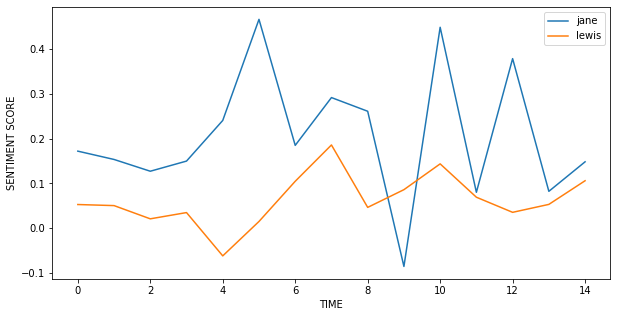

In [405]:
plt.figure(figsize=(10,5))
plt.plot(jane,label="jane")
plt.plot(lewis,label="lewis")
plt.legend()
plt.xlabel("TIME")
plt.ylabel("SENTIMENT SCORE")